# EXPLORING NASA’S TURBOFAN DATASET
<hr>

## About Dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# define filepath to read data
dir_path = './CMaps/'

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv((dir_path+'train_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path+'test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


When we inspect the `unit_nr` descriptive statistics it can be seen that the dataset has a total of 20631 rows, unit members starting at 1 to 100 as expected. From the `time_cycles`, it took some engines a maximum of *362 time cycles* to run to failure and the average engine breaks between *199* and *206 cycles*. However, a standard deviation of *46 cycles* is very large.  

In [3]:
# details of 3 operational settings 
train[setting_names].describe()

,setting_1,setting_2,setting_3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


Looking at the three operating conditions the it can be seen that the standard deviation of both `settings_1` and `settings_2` have small fluctuations but `settings_3` has 0 with other statistics at 100. 

In [4]:
# details of sensors
train[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000


It can be observed that the standard deviations of sensor 18, and 19 have 0 fluctuations nad these can safely be discarded as they hild no useful information. Inspecting the quantiles indicates sensor 1, 5, 6, 10 and 15 have very little fluctuations and requires further inspection while sensor 9 and 14 seems to have the highest fluctuation.

## Computing RUL

Remaining Useful Life (RUL) is the target variable which will be used to serve two purposes:
1. It will be used to plot against the signals for easy interpretation of the changes in each sensor signals as the engine nears breakdown
2. It will serve as the target variable for the supervised machine learning models

`RUL = max_time_cycle - time_cycle`

In [5]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


## Data Visualization

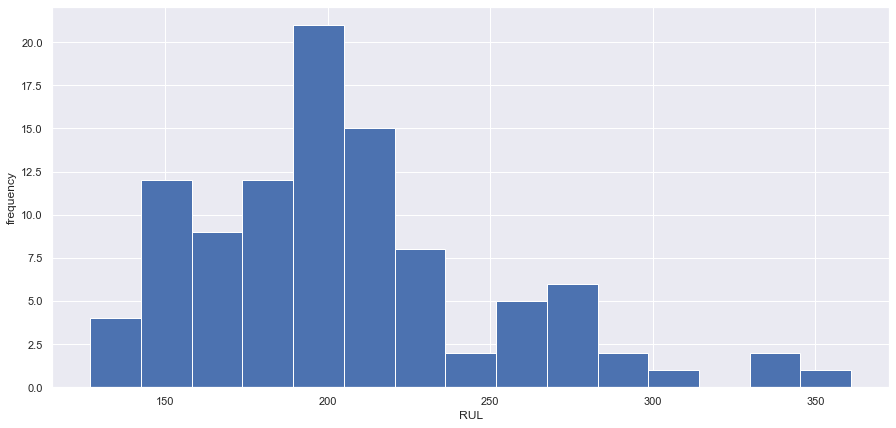

In [6]:
# distribution of RUL, similar to the 'describe function' of time_cycles above, but visual
df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

In [7]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,7))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):
            plt.plot('RUL', sensor_name, data=train[train['unit_nr'] == i])
    plt.xlim(250, 0) # reverse the x_axis
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()

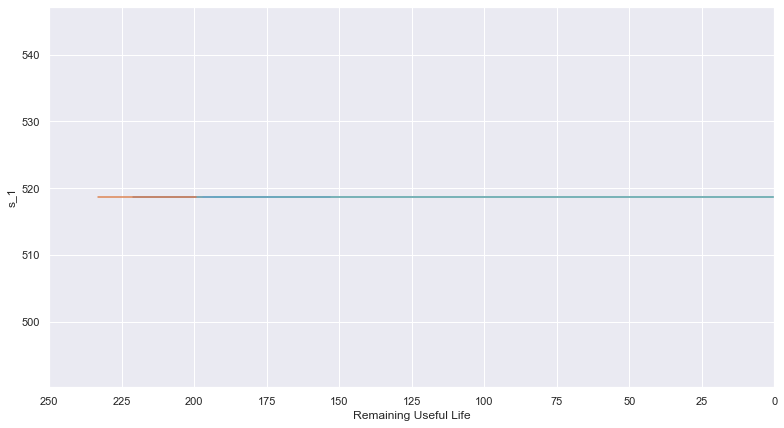

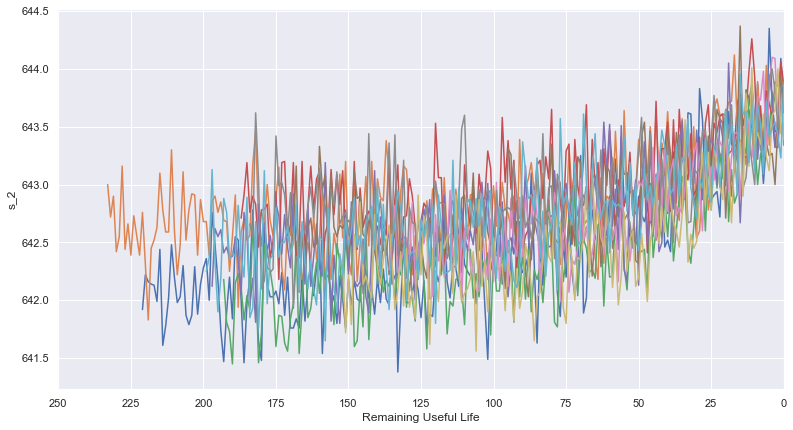

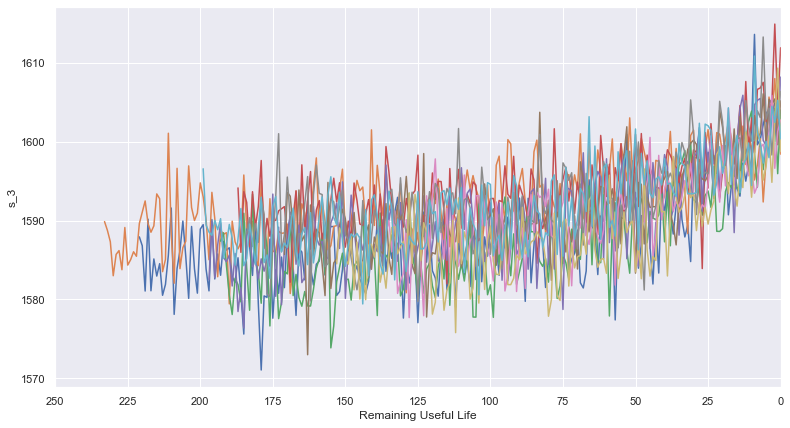

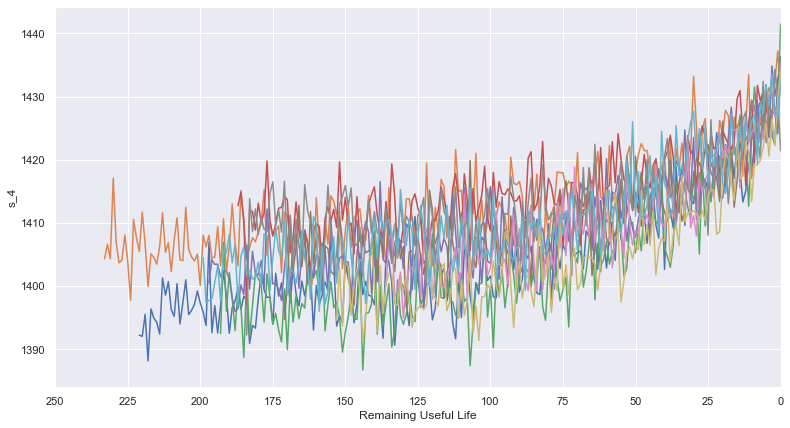

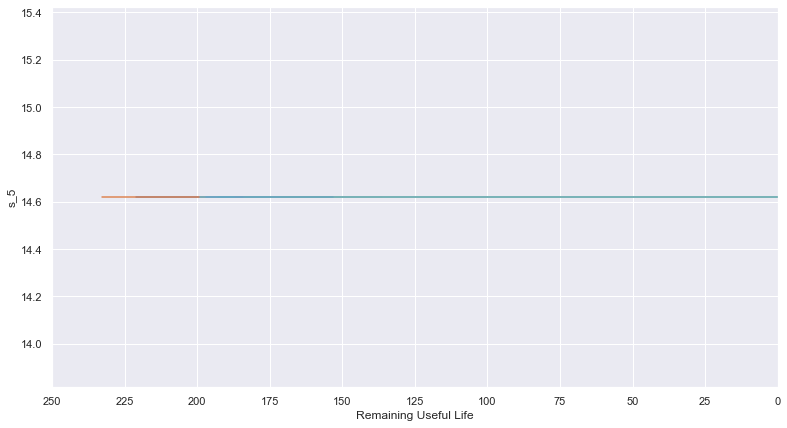

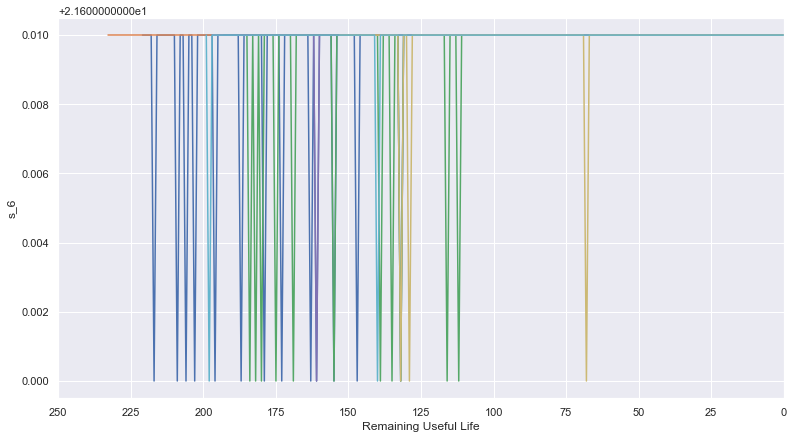

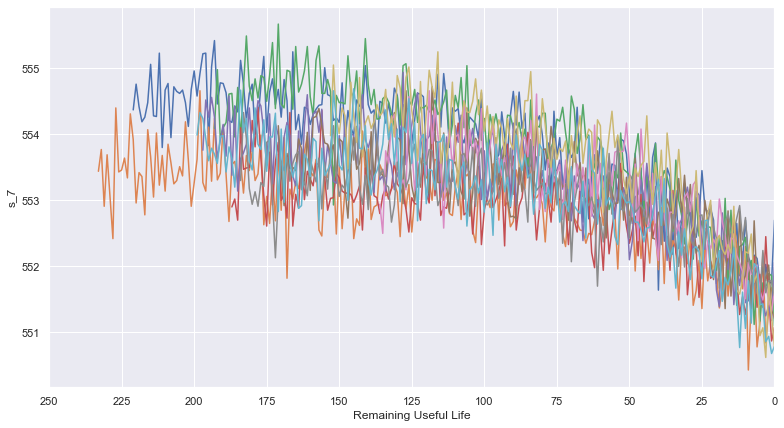

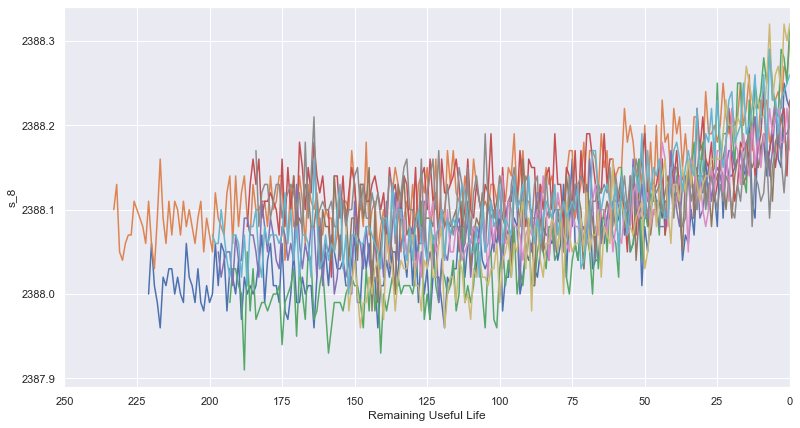

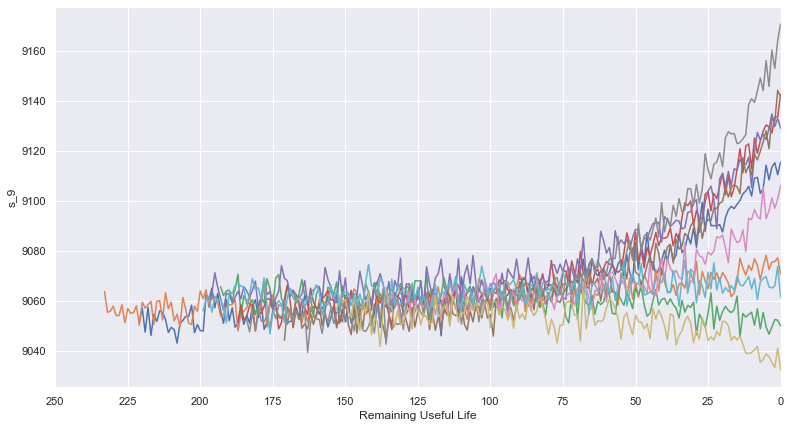

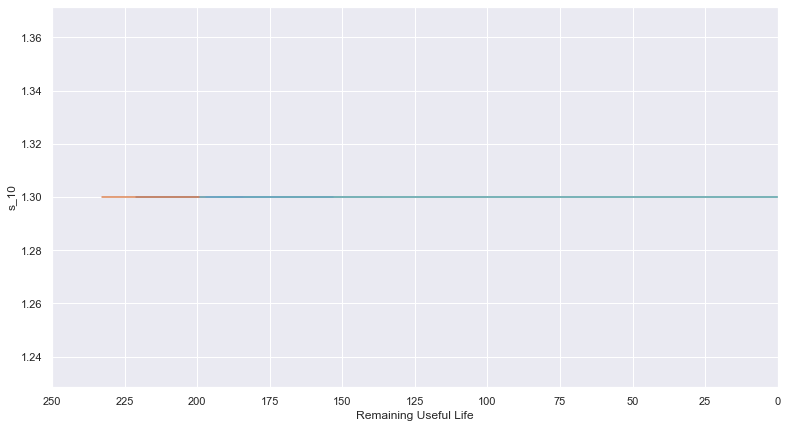

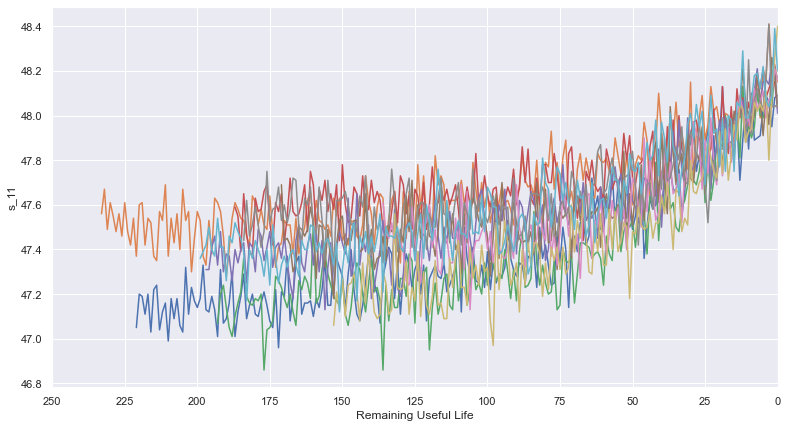

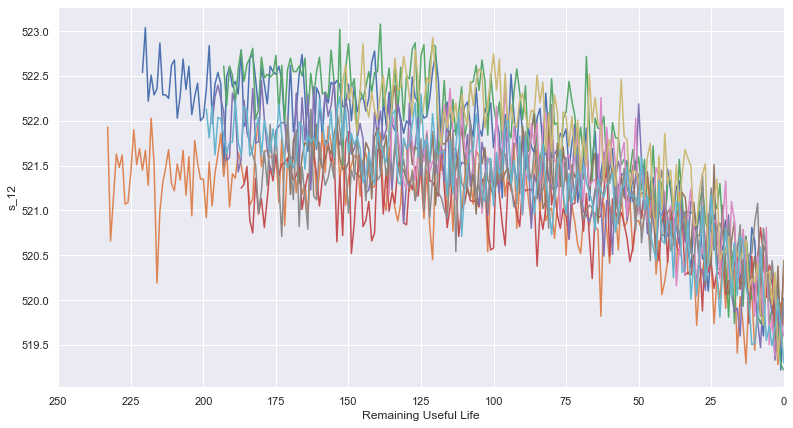

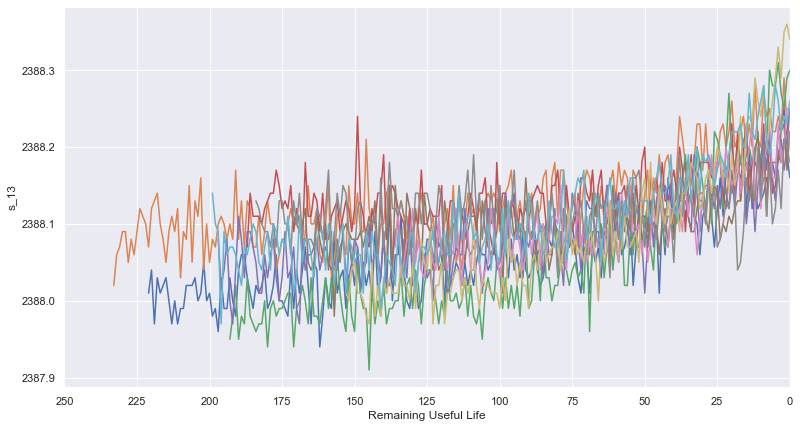

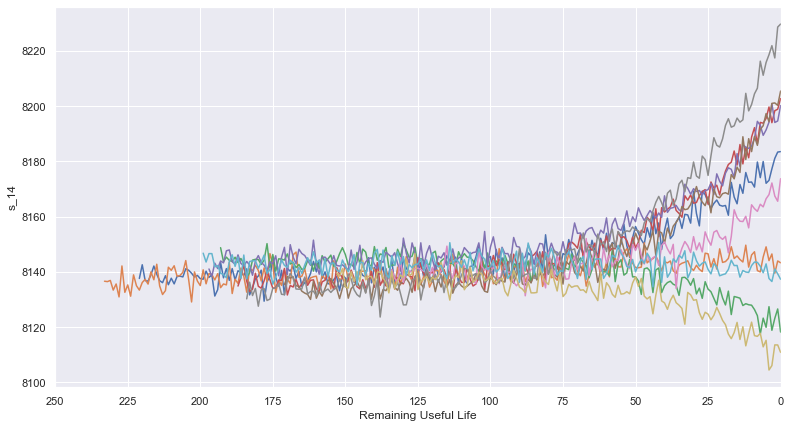

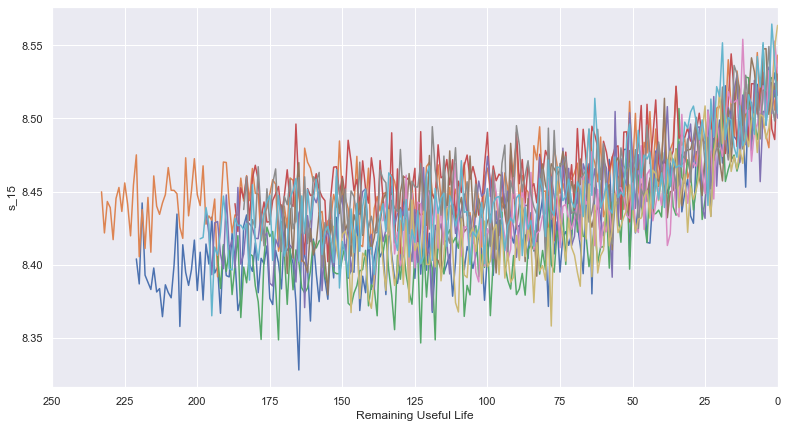

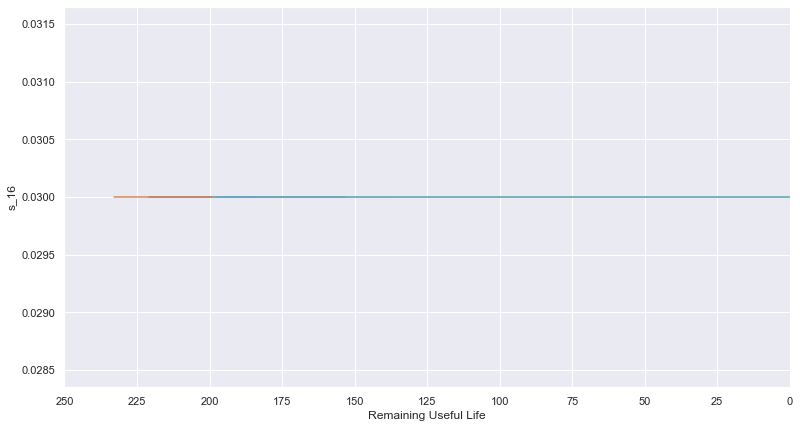

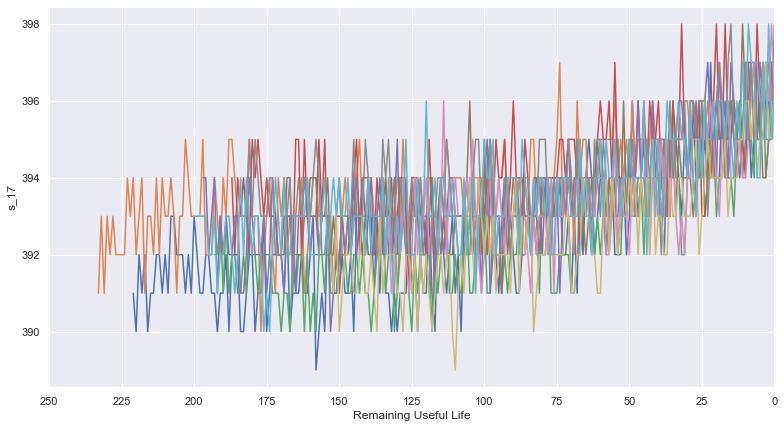

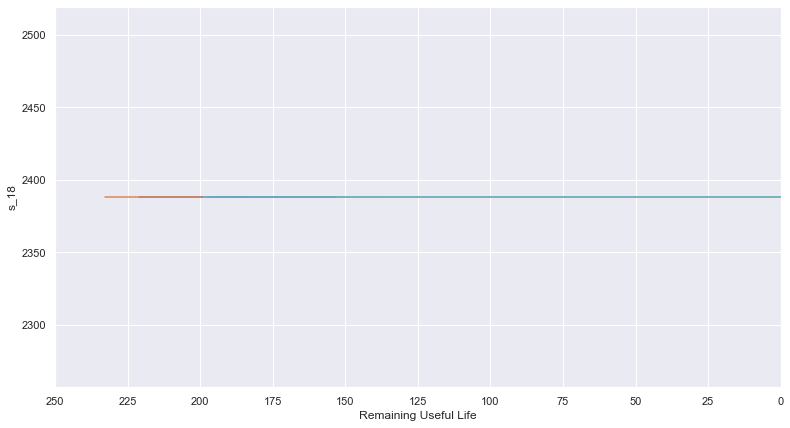

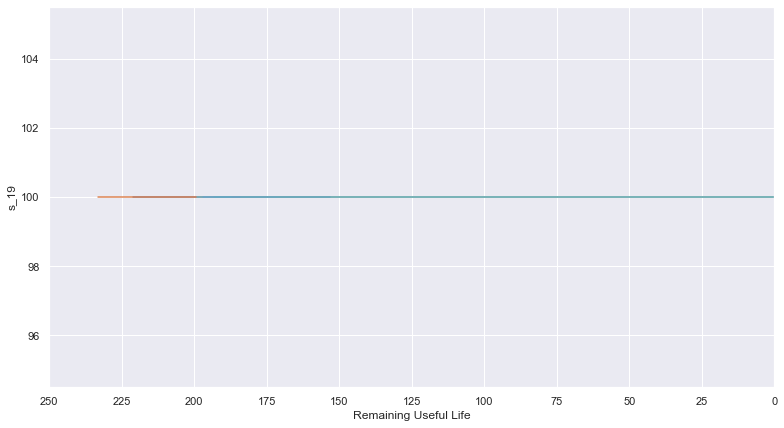

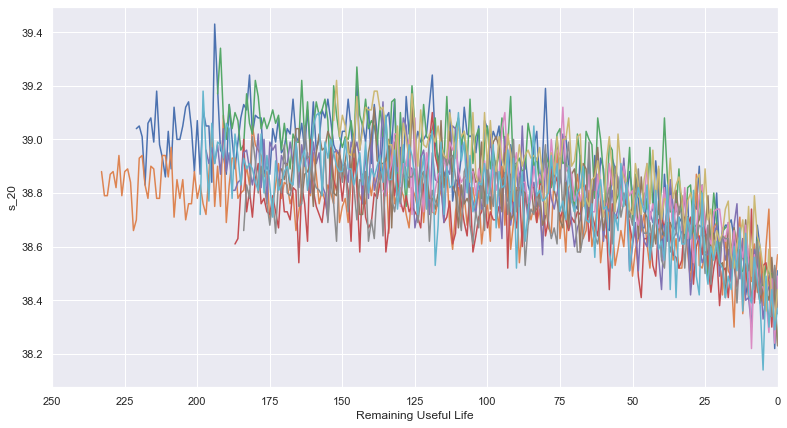

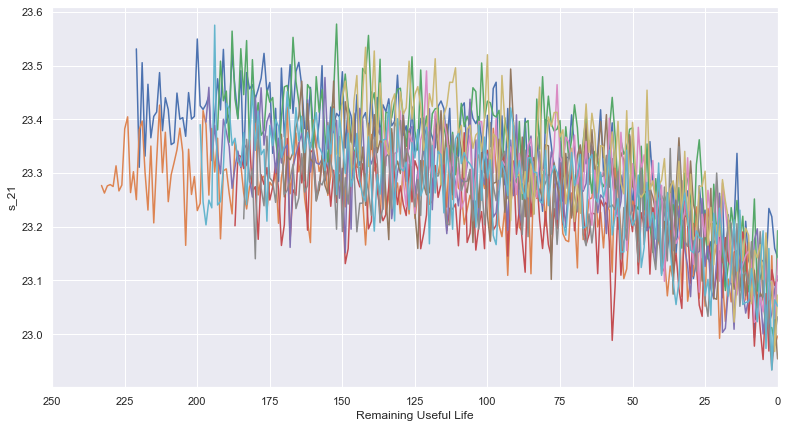

In [8]:
# plotting sensor 
for sensor_name in sensor_names:
    plot_sensor(sensor_name)

- Sensors 1, 5, 10, 16, 18, and 19 showed no fluctuations as they flat throughout the cycles. This indicates the sensors hold no useful information, which confirms made on the descriptive analysis.<br>
- Sensor 2 shows a rising trend and similar trend can be seen in sensors 3, 4, 8, 11, 13, 15, and 17.<br>
- Sensor 6 readings peak downwards and then rises but doesn't shows any signs as the engine runs to failure.<br>
- Sensor 7 shows a declining trend as the engine breaks so as sensors 12, 20, and 21.<br>
- Sensor 9 and 14 show similar patterns as the engine draws to failure.<br><br>
Based on the Exploratory Data Analysis, sensor 1, 5, 6, 10, 16, 18 and 19 holds no useful information and can be dropped 

## Splitting Data

In [9]:
# first create an evaluate function
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [10]:
# drop unwanted columns and split target variable from training set
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
drop_labels = index_names+setting_names+drop_sensors

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

# Since the true RUL values for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)


print(X_train.columns)  # check remaining columns

Index(['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13',
       's_14', 's_15', 's_17', 's_20', 's_21'],
      dtype='object')


## Linear Regression as Basemodel

In [11]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:44.668191595454275, R2:0.5794486527796765
test set RMSE:31.952633027746604, R2:0.40877368076556364


Note the RMSE on the test set is lower. This may be explained because the RUL of the training set contains more samples of high RUL compared to the test set and high RUL does not necessarily correlate with the sensor signals. See image below

## Re-examining RUL

Previously the RUL was assumed to be decreasing linearly with time. However this may influence the model performance. To do this the lower RUL values must be considered and this can be done by trimming the uppper threshold as it can be seen in the plot below.

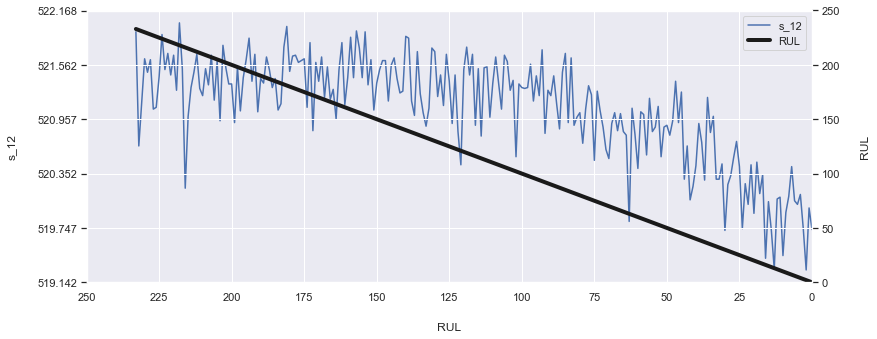

In [12]:
fig, ax1 = plt.subplots(1,1, figsize=(13,5))

signal = ax1.plot('RUL', 's_12', 'b',
                 data=train.loc[train['unit_nr']==20])
plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
plt.xticks(np.arange(0, 275, 25))
ax1.set_ylabel('s_12', labelpad=20)
ax1.set_xlabel('RUL', labelpad=20)

ax2 = ax1.twinx()
rul_line = ax2.plot('RUL', 'RUL', 'k', linewidth=4,
                   data=train.loc[train['unit_nr']==20])
ax2.set_ylabel('RUL', labelpad=20)

# code to have equal spacing of y ticks for both axes, so the gridlines allign
# from https://stackoverflow.com/questions/20243683/matplotlib-align-twinx-tick-marks?rq=1
ax2.set_ylim(0, 250)  # set limits of axis you want to display neatly
ax2.set_yticks(
    np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))  # choose integer to neatly divide your axis, in our case 6
ax1.set_yticks(
    np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))  # apply same spacing to other axis

# code to have a unified legend
# from https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines = signal+rul_line
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc=0)


plt.show()

The data remains constant until it reaches 125 before it starts declining.<br><br>
Refitting baseline model.

In [13]:
# define clipped RUL
y_train_clipped = y_train.clip(upper=125)

# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train_clipped)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:21.491018701514868, R2:0.7340432868050581
test set RMSE:21.90021340689193, R2:0.7222608196545882


The performance have improved about 50% compared to the previous training.

## Support Vector Regression

In [14]:
from sklearn.svm import SVR

In [15]:
# create and fit model
svr = SVR(kernel='linear')
svr.fit(X_train, y_train_clipped)

# predict and evaluate 
y_hat_train = svr.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:30.935591377378746, R2:0.448921080628116
test set RMSE:33.009842780487034, R2:0.369002893795529


The model performed worse when compared to the baseline model because Support Vector Machines work best when the data is scaled

In [16]:
# Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM polynomial regression
svr = SVR(kernel='poly', degree=2, coef0=10)
svr.fit(X_train_scaled, y_train_clipped)

# predict and evaluate 

y_hat_train = svr.predict(X_train_scaled)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_scaled)
evaluate(y_test, y_hat_test)

train set RMSE:19.55794323867165, R2:0.7797361045078898
test set RMSE:20.380848449697826, R2:0.7594612913855509


After scaling, svm achieved a rmse of 20.38 and an R2 score of 0.76 which is way better than the previous unscaled one. 

## Random Forest Regression


In [18]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rnd_forest = RandomForestRegressor(n_estimators=200, max_features='sqrt', random_state=42)
rnd_forest.fit(X_train, y_train_clipped)

# predict and evaluate
y_hat_train = rnd_forest1.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = rnd_forest1.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:6.69060359044234, R2:0.9742232860882492
test set RMSE:17.748758195997826, R2:0.817578340889202


So far Random Forest model achieved the best results with an R2 score of 0.82.